In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("car data.csv")

In [3]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [4]:
df.shape

(301, 9)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [6]:
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [7]:
df.describe(include=['object'])

,Car_Name,Fuel_Type,Seller_Type,Transmission
count,301,301,301,301
unique,98,3,2,2
top,city,Petrol,Dealer,Manual
freq,26,239,195,261


In [8]:
df.describe(include=['float64', 'int64'])

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [9]:
df.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner'],
      dtype='object')

In [10]:
final_dataset = df[[ 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner']]

In [11]:
final_dataset['Age of Car'] = 2020 - final_dataset['Year']

In [12]:
final_dataset.sample(5)

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Age of Car
164,2016,0.45,0.54,14000,Petrol,Individual,Manual,0,4
277,2015,9.70,13.60,21780,Petrol,Dealer,Manual,0,5
284,2013,3.50,5.90,9800,Petrol,Dealer,Manual,0,7
169,2015,0.40,0.54,14000,Petrol,Individual,Manual,0,5
75,2015,3.95,6.80,36000,Petrol,Dealer,Manual,0,5


In [13]:
final_dataset.drop('Year', axis=1,inplace=True)

In [14]:
final_dataset = pd.get_dummies(final_dataset,drop_first=True)

In [15]:
final_dataset.shape

(301, 9)

In [16]:
final_dataset.sample(5)

,Selling_Price,Present_Price,Kms_Driven,Owner,Age of Car,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
42,1.95,7.15,58000,0,12,0,1,0,1
270,4.10,10.00,69341,0,9,0,1,0,1
174,0.38,0.72,38600,0,5,0,1,1,1
147,0.55,0.84,58000,0,5,0,1,1,1
35,2.95,7.74,49998,0,9,0,0,0,1


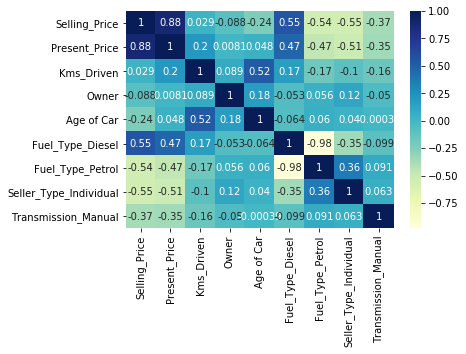

In [17]:
import seaborn as sns
sns.heatmap(final_dataset.corr(), annot = True, cmap = "YlGnBu")

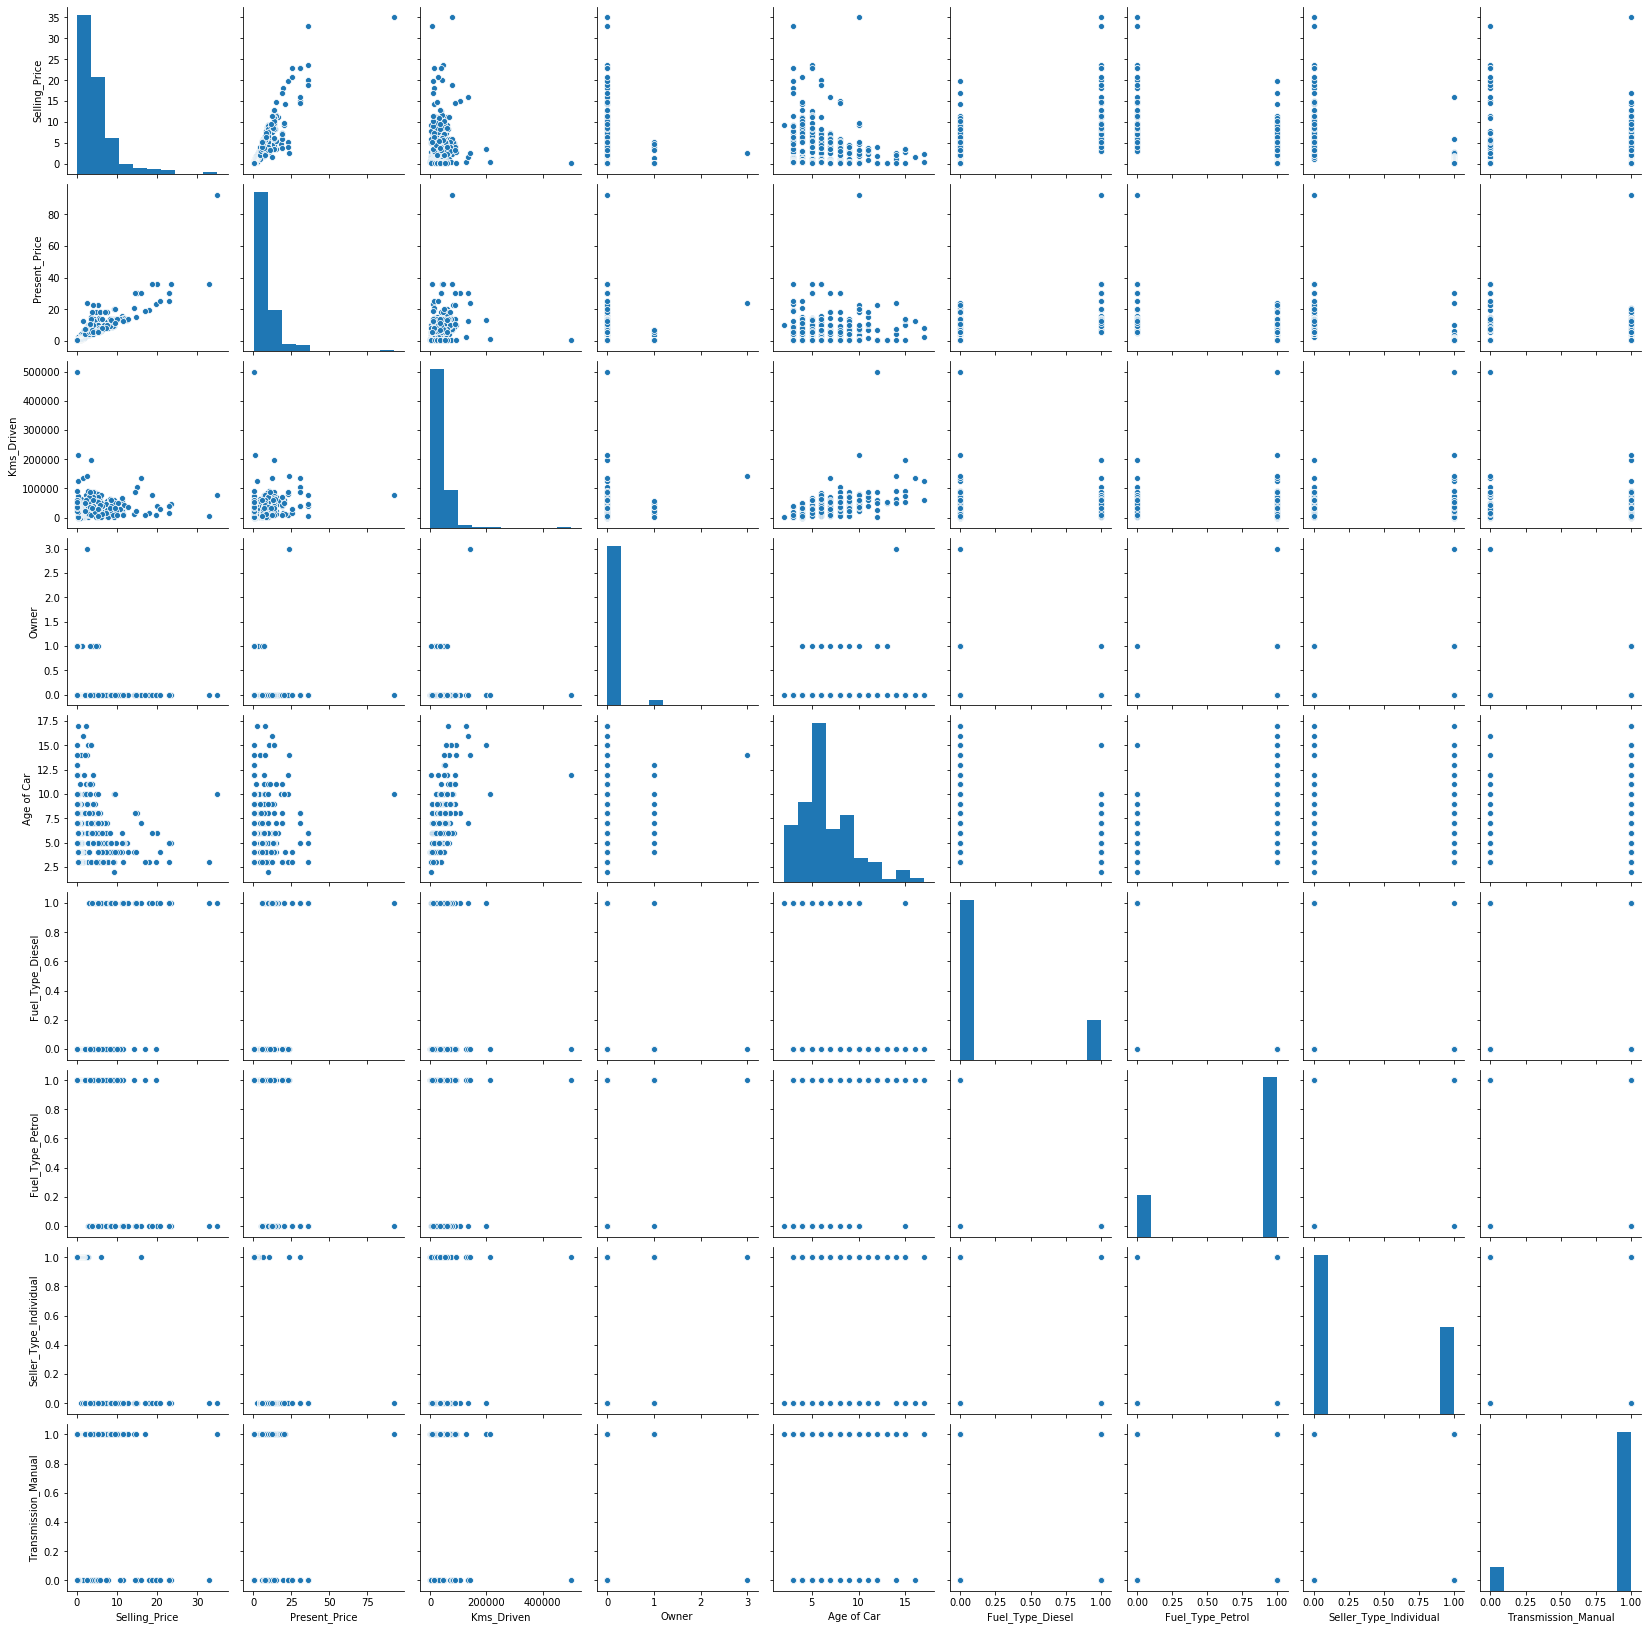

In [18]:
sns.pairplot(final_dataset)

In [19]:
X = final_dataset.drop('Selling_Price', axis =1)
y = final_dataset['Selling_Price']

In [20]:
from sklearn.ensemble import ExtraTreesRegressor

In [21]:
model = ExtraTreesRegressor()
model.fit(X,y)

ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                    max_depth=None, max_features='auto', max_leaf_nodes=None,
                    max_samples=None, min_impurity_decrease=0.0,
                    min_impurity_split=None, min_samples_leaf=1,
                    min_samples_split=2, min_weight_fraction_leaf=0.0,
                    n_estimators=100, n_jobs=None, oob_score=False,
                    random_state=None, verbose=0, warm_start=False)

In [22]:
print(model.feature_importances_)

[4.05155955e-01 4.12244470e-02 3.44655963e-04 7.84243063e-02
 2.06325932e-01 1.08197801e-02 1.26857239e-01 1.30847684e-01]


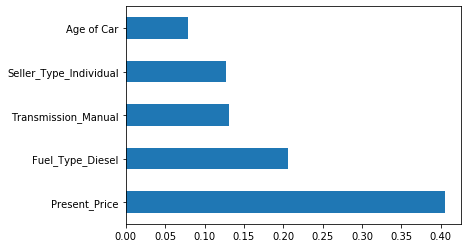

In [23]:
import matplotlib.pyplot as plt
feat_importance = pd.Series(model.feature_importances_, index = X.columns)
feat_importance.nlargest(5).plot(kind = 'barh')

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 43)

In [26]:
X_train.shape, y_train.shape

((240, 8), (240,))

In [27]:
from sklearn.ensemble import RandomForestRegressor

In [28]:
forest = RandomForestRegressor()

In [29]:
### Hyperparameters
import numpy as np
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
max_features = ['auto','sqrt']
max_depth = [int(x) for x in np.linspace(5,30,6)]
min_samples_split = [2, 5, 10, 15, 100]
min_samples_leaf = [1,2,5,10]

In [30]:
from sklearn.model_selection import RandomizedSearchCV

In [31]:
param_grid = {'n_estimators':n_estimators,
             'max_features':max_features,
             'max_depth':max_depth,
             'min_samples_split':min_samples_split,
             'min_samples_leaf':min_samples_leaf}

In [32]:
random_grid = RandomizedSearchCV(estimator = forest, param_distributions = param_grid, scoring = 'neg_mean_squared_error',n_iter = 10, cv =5, verbose = 1, n_jobs = -1)

In [33]:
random_grid.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   12.2s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   14.7s finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                              

In [34]:
predictions = random_grid.predict(X_test)

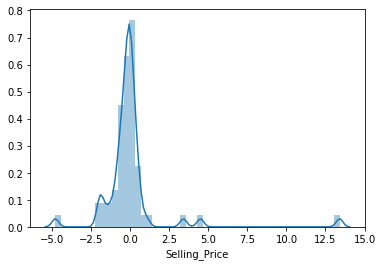

In [35]:
sns.distplot(y_test - predictions)

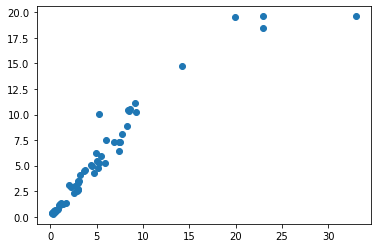

In [36]:
plt.scatter(y_test, predictions)

In [37]:
import pickle
file = open("Random_Forest_Regression_model.pkl",'wb')
pickle.dump(random_grid, file)